# *Random Forest Model vs. Logistic Regression Model*

In [1]:
import pandas as pd

### Loading the Data

In [2]:
# Load the Excel file- Kyle
#from google.colab import drive
#drive.mount('/content/drive')
#file_path = '/content/drive/My Drive/Colab Notebooks/data/2024-MLB-SCORES.xlsx'


In [3]:
# Load the Excel file- Richard
file_path = r"C:\Users\Richard Kianos\Downloads\2024-MLB-SCORES.xlsx"
xls = pd.ExcelFile(file_path)

In [4]:
# Display sheet names to understand the structure of the file
xls.sheet_names

['2024-MLB-SCORES']

In [5]:
# Load the sheet into a DataFrame
mlb_season = xls.parse('2024-MLB-SCORES')

# Display the first few rows to understand the structure
mlb_season.head(10)


,BIGDATABALL\nDATASET,GAME-ID,DATE,GAME TIME \n(ET),GAME TIME \n(LOCAL),AWAY\nTEAM,AWAY\nSCORE,HOME\nSCORE,HOME\nTEAM,PITCHER \n(W),PITCHER\n(L),PITCHER\n(S),ATTENDANCE,VENUE,DURATION,DAY\nNIGHT,GROUND
0,MLB 2024 Regular Season,45371-LAD@SDP-1,2024-03-20,05:05:00,19:05:00,Los Angeles Dodgers,5,2,San Diego Padres,Daniel Hudson (1-0),Jhony Brito (0-1),Evan Phillips (1),15952.0,Gocheok Sky Dome,3:05,Night,Artificial Turf
1,MLB 2024 Regular Season,45372-SDP@LAD-1,2024-03-21,05:05:00,19:05:00,San Diego Padres,15,11,Los Angeles Dodgers,Michael King (1-0),Yoshinobu Yamamoto (0-1),Robert Suarez (1),15928.0,Gocheok Sky Dome,3:42,Night,Artificial Turf
2,MLB 2024 Regular Season,45379-COL@ARI-1,2024-03-28,21:10:00,19:10:00,Colorado Rockies,1,16,Arizona Diamondbacks,Zac Gallen (1-0),Kyle Freeland (0-1),NaN,49011.0,Chase Field,2:37,Night,Artificial Turf
3,MLB 2024 Regular Season,45379-LAA@BAL-1,2024-03-28,15:05:00,15:05:00,Los Angeles Angels,3,11,Baltimore Orioles,Corbin Burnes (1-0),Patrick Sandoval (0-1),NaN,45029.0,Oriole Park at Camden Yards,2:43,Day,Grass
4,MLB 2024 Regular Season,45379-DET@CHW-1,2024-03-28,16:10:00,15:10:00,Detroit Tigers,1,0,Chicago White Sox,Tarik Skubal (1-0),Garrett Crochet (0-1),Jason Foley (1),33420.0,Guaranteed Rate Field,2:03,Day,Grass
5,MLB 2024 Regular Season,45379-WSN@CIN-1,2024-03-28,16:10:00,16:10:00,Washington Nationals,2,8,Cincinnati Reds,Frankie Montas (1-0),Josiah Gray (0-1),NaN,44030.0,Great American Ball Park,2:18,Day,Grass
6,MLB 2024 Regular Season,45379-NYY@HOU-1,2024-03-28,16:10:00,15:10:00,New York Yankees,5,4,Houston Astros,Jonathan Loáisiga (1-0),Ryan Pressly (0-1),Clay Holmes (1),42642.0,Minute Maid Park,2:41,Day,Grass
7,MLB 2024 Regular Season,45379-MIN@KCR-1,2024-03-28,16:10:00,15:10:00,Minnesota Twins,4,1,Kansas City Royals,Pablo López (1-0),Cole Ragans (0-1),Griffin Jax (1),38775.0,Kauffman Stadium,2:29,Day,Grass
8,MLB 2024 Regular Season,45379-STL@LAD-1,2024-03-28,16:10:00,13:10:00,St. Louis Cardinals,1,7,Los Angeles Dodgers,Tyler Glasnow (1-0),Miles Mikolas (0-1),Ryan Yarbrough (1),52667.0,Dodger Stadium,2:23,Day,Grass
9,MLB 2024 Regular Season,45379-PIT@MIA-1,2024-03-28,16:10:00,16:10:00,Pittsburgh Pirates,6,5,Miami Marlins,Luis Ortiz (1-0),Declan Cronin (0-1),Jose Hernandez (1),32564.0,loanDepot park,3:24,Day,Artificial Turf


In [6]:
# Standardizing column names for ease of access
mlb_season.columns = [col.strip().replace("\n", " ") for col in mlb_season.columns]

# Creating 'Winner'  column
mlb_season['Winner'] = mlb_season.apply(lambda row: row["HOME TEAM"] if row["HOME SCORE"] > row["AWAY SCORE"] else row["AWAY TEAM"], axis=1)

# Display the updated dataframe
print(mlb_season.head())

mlb_season.columns



       BIGDATABALL DATASET          GAME-ID       DATE GAME TIME  (ET)  \
0  MLB 2024 Regular Season  45371-LAD@SDP-1 2024-03-20        05:05:00   
1  MLB 2024 Regular Season  45372-SDP@LAD-1 2024-03-21        05:05:00   
2  MLB 2024 Regular Season  45379-COL@ARI-1 2024-03-28        21:10:00   
3  MLB 2024 Regular Season  45379-LAA@BAL-1 2024-03-28        15:05:00   
4  MLB 2024 Regular Season  45379-DET@CHW-1 2024-03-28        16:10:00   

  GAME TIME  (LOCAL)            AWAY TEAM  AWAY SCORE  HOME SCORE  \
0           19:05:00  Los Angeles Dodgers           5           2   
1           19:05:00     San Diego Padres          15          11   
2           19:10:00     Colorado Rockies           1          16   
3           15:05:00   Los Angeles Angels           3          11   
4           15:10:00       Detroit Tigers           1           0   

              HOME TEAM         PITCHER  (W)               PITCHER (L)  \
0      San Diego Padres  Daniel Hudson (1-0)         Jhony Brito (

Index(['BIGDATABALL DATASET', 'GAME-ID', 'DATE', 'GAME TIME  (ET)',
       'GAME TIME  (LOCAL)', 'AWAY TEAM', 'AWAY SCORE', 'HOME SCORE',
       'HOME TEAM', 'PITCHER  (W)', 'PITCHER (L)', 'PITCHER (S)', 'ATTENDANCE',
       'VENUE', 'DURATION', 'DAY NIGHT', 'GROUND', 'Winner'],
      dtype='object')

In [7]:
mlb_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472 entries, 0 to 2471
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   BIGDATABALL DATASET  2472 non-null   object        
 1   GAME-ID              2472 non-null   object        
 2   DATE                 2472 non-null   datetime64[ns]
 3   GAME TIME  (ET)      2472 non-null   object        
 4   GAME TIME  (LOCAL)   2472 non-null   object        
 5   AWAY TEAM            2472 non-null   object        
 6   AWAY SCORE           2472 non-null   int64         
 7   HOME SCORE           2472 non-null   int64         
 8   HOME TEAM            2472 non-null   object        
 9   PITCHER  (W)         2472 non-null   object        
 10  PITCHER (L)          2472 non-null   object        
 11  PITCHER (S)          1250 non-null   object        
 12  ATTENDANCE           2456 non-null   float64       
 13  VENUE                2472 non-nul

### Importing Libraries

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, f1_score
from collections import Counter
from sklearn.model_selection import cross_val_score
import seaborn as sns

### Training and Testing Data- 80/20 Split

In [45]:
# Encoding target variable (Winner)
encoder = LabelEncoder()
mlb_season["Winner_Label"] = encoder.fit_transform(mlb_season["WINNER"])  # Apply encoding to full dataset

# Selecting relevant features
features = ['AWAY SCORE', 'HOME SCORE', 'ATTENDANCE']
categorical_features = ['AWAY TEAM', 'HOME TEAM', 'VENUE', 'DAY NIGHT', 'GROUND']

# One-Hot Encoding for categorical features
X = pd.get_dummies(mlb_season[features + categorical_features], drop_first=True)
y = mlb_season["Winner_Label"]  # Target variable

# **Split the dataset into 80% training and 20% testing**
X_train, X_test, y_train, y_test = train_test_split(X, mlb_season["Winner_Label"], test_size=0.2, random_state=42, stratify=mlb_season["Winner_Label"])

# Ensure columns match between training and testing sets
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

# Handling missing values
imputer_numeric = SimpleImputer(strategy="median")
X_train[features] = imputer_numeric.fit_transform(X_train[features])
X_test[features] = imputer_numeric.transform(X_test[features])

# Scale numerical features
scaler = StandardScaler()
X_train[features] = scaler.fit_transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])

# Train Logistic Regression model
logreg = LogisticRegression(max_iter=7000)
logreg.fit(X_train, y_train)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on test set
y_pred_rf = rf_model.predict(X_test)
y_pred_logreg = logreg.predict(X_test)

# Evaluate Accuracy
train_accuracy_rf = accuracy_score(y_train, rf_model.predict(X_train))
train_accuracy_logreg = accuracy_score(y_train, logreg.predict(X_train))

test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
test_accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Display Results
print("Training Accuracy (Random Forest): {:.5f}".format(train_accuracy_rf))
print("Training Accuracy (Logistic Regression): {:.5f}".format(train_accuracy_logreg))
print("Testing Accuracy (Random Forest): {:.5f}".format(test_accuracy_rf))
print("Testing Accuracy (Logistic Regression): {:.5f}".format(test_accuracy_logreg))


Training Accuracy (Random Forest): 1.00000
Training Accuracy (Logistic Regression): 0.74001
Testing Accuracy (Random Forest): 0.70707
Testing Accuracy (Logistic Regression): 0.48283


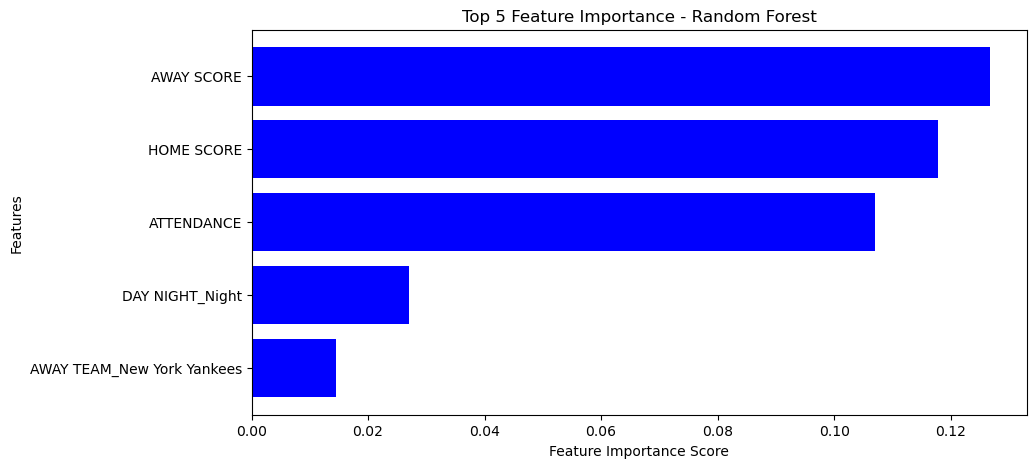

In [46]:
# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sort feature importance in descending order and select top 10
sorted_idx = np.argsort(importances)[::-1][:5]  # Keep only the top 10 features

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align="center", color="blue")
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 5 Feature Importance - Random Forest")
plt.gca().invert_yaxis()  # Invert y-axis to show most important at the top
plt.show()


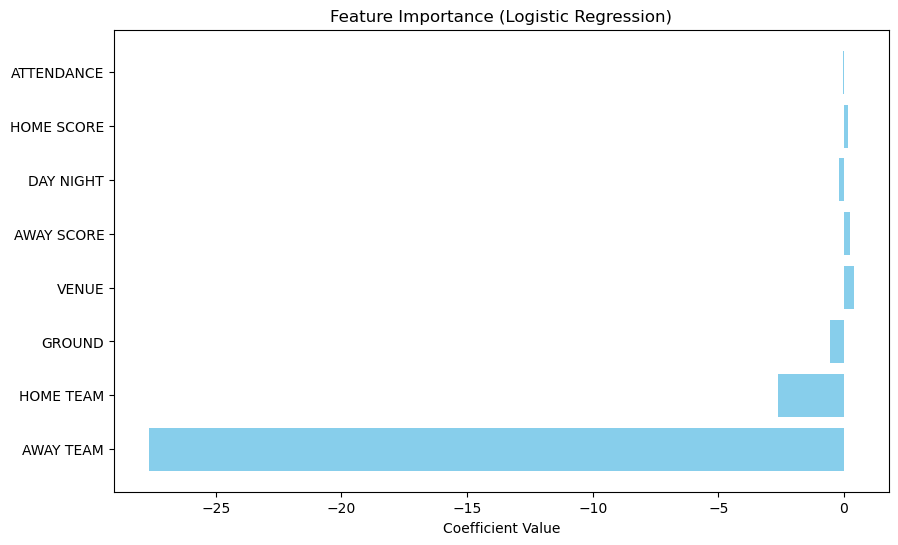

In [47]:
# Feature Importance for LogReg

# Get the coefficients
coefficients = logreg.coef_[0]

# Get feature names (X_train is your DataFrame after one-hot encoding)
feature_names = X_train.columns

# Create a DataFrame with feature names and corresponding coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Aggregate coefficients for one-hot encoded features
coef_df['Feature_Category'] = coef_df['Feature'].apply(lambda x: x.split('_')[0])

# Group by feature category and sum the coefficients
aggregated_coef_df = coef_df.groupby('Feature_Category').sum().reset_index()

# Sort by absolute value of the coefficients
aggregated_coef_df['Abs_Coefficient'] = aggregated_coef_df['Coefficient'].abs()
aggregated_coef_df = aggregated_coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(aggregated_coef_df['Feature_Category'], aggregated_coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Logistic Regression)')
plt.show()


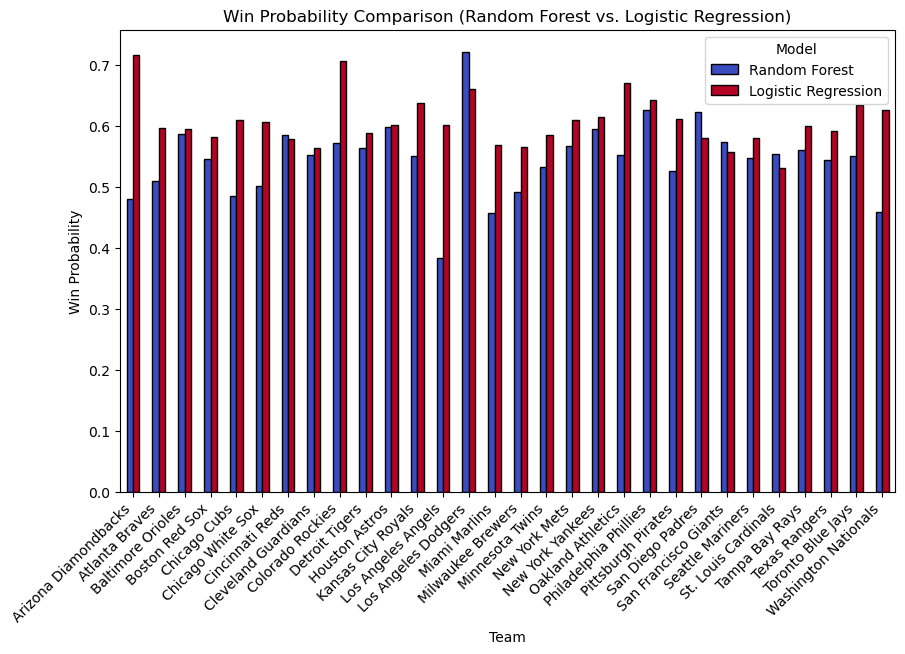

In [48]:
# Get predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_logreg = logreg.predict(X_test)

# Convert encoded labels in y_test back to actual team names BEFORE aggregation
teams_test = encoder.inverse_transform(y_test)  # Ensure this gives proper team names

# Create DataFrame with correct team names
win_prob_df = pd.DataFrame({
    "Team": teams_test,  # Assign before aggregation to maintain correct length
    "Random Forest": np.max(rf_model.predict_proba(X_test), axis=1),
    "Logistic Regression": np.max(logreg.predict_proba(X_test), axis=1)
})

# Aggregate (Average Probability Per Team)
win_prob_df = win_prob_df.groupby("Team").mean().reset_index()  # Now "Team" aligns correctly

# Fix X-Axis Labels for the Bar Plot
fig, ax = plt.subplots(figsize=(10, 6))
win_prob_df.set_index("Team").plot(kind="bar", ax=ax, colormap="coolwarm", edgecolor="black")

plt.title("Win Probability Comparison (Random Forest vs. Logistic Regression)")
plt.ylabel("Win Probability")
plt.xlabel("Team")
plt.xticks(rotation=45, ha="right")  # Ensure team names are displayed properly
plt.legend(title="Model")
plt.show()


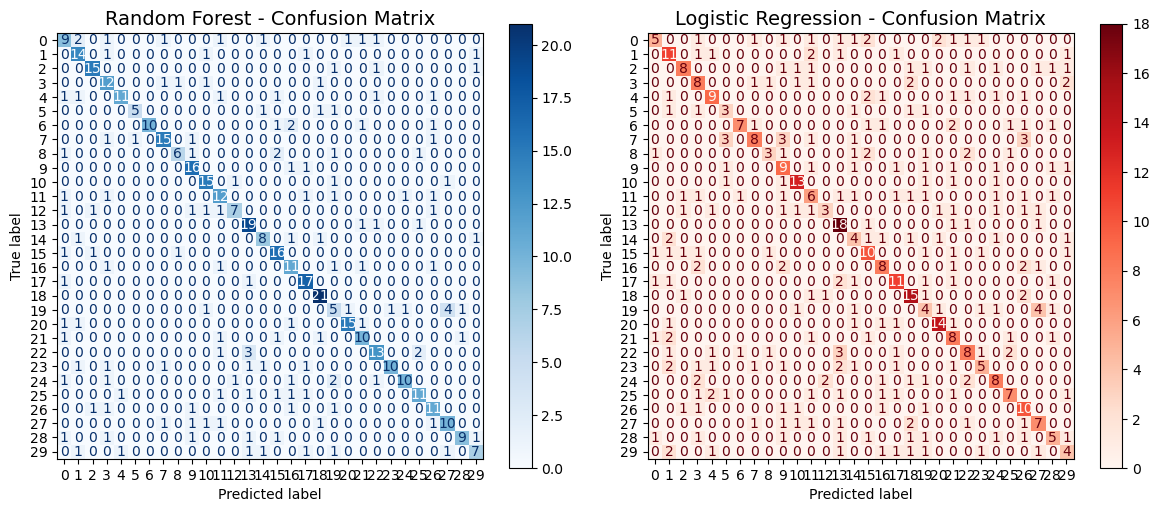

In [49]:
# Compute Confusion Matrices
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

#Confusion Matrix Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Random Forest Confusion Matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(ax=axes[0], cmap="Blues", values_format="d")
axes[0].set_title("Random Forest - Confusion Matrix", fontsize=14)

# Logistic Regression Confusion Matrix
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg)
disp_logreg.plot(ax=axes[1], cmap="Reds", values_format="d")
axes[1].set_title("Logistic Regression - Confusion Matrix", fontsize=14)

plt.tight_layout()
plt.show()

In [50]:
# Placeholder variables (Assume y_test, y_pred_rf, y_pred_logreg exist from prior execution)
# If needed, redefine y_test, y_pred_rf, y_pred_logreg before running this code

# Calculate precision and F1-score for Random Forest
precision_rf = precision_score(y_test, y_pred_rf, average="weighted", zero_division=0)
f1_score_rf = f1_score(y_test, y_pred_rf, average="weighted")

# Calculate precision and F1-score for Logistic Regression
precision_logreg = precision_score(y_test, y_pred_logreg, average="weighted", zero_division=0)
f1_score_logreg = f1_score(y_test, y_pred_logreg, average="weighted")


# Display results
precision_f1_results = {
    "Model": ["Random Forest", "Logistic Regression"],
    "Precision": [precision_rf, precision_logreg],
    "F1 Score": [f1_score_rf, f1_score_logreg]
}

precision_f1_df = pd.DataFrame(precision_f1_results)
print(precision_f1_df)


                 Model  Precision  F1 Score
0        Random Forest   0.720165  0.705628
1  Logistic Regression   0.495623  0.478259


In [51]:
# Cross-validation for Logistic Regression
logreg_cv_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring="accuracy")
print("Logistic Regression Cross-validation Accuracy:", logreg_cv_scores.mean())

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="accuracy")
print("Random Forest Cross-validation Accuracy:", rf_cv_scores.mean())

Logistic Regression Cross-validation Accuracy: 0.5245416187188339
Random Forest Cross-validation Accuracy: 0.6798018156246004


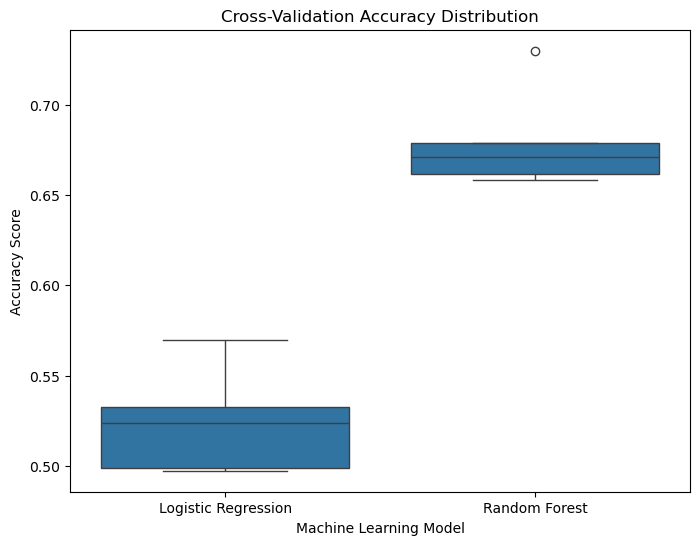

In [58]:
# Combine scores for visualization
cv_results = {
    "Model": ["Logistic Regression"] * len(logreg_cv_scores) + ["Random Forest"] * len(rf_cv_scores),
    "Accuracy": np.concatenate([logreg_cv_scores, rf_cv_scores])
}

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Model", y="Accuracy", data=cv_results)
plt.title("Cross-Validation Accuracy Distribution")
plt.ylabel("Accuracy Score")
plt.xlabel("Machine Learning Model")
plt.show()


# **Now let's test to see how the models predict the MLB Playoffs**

### Training and Testing the data using Regular Season and Playoff Data

In [15]:
# Splitting Regular Season (Training) and Postseason (Testing)
train_reg_season = mlb_season[mlb_season['BIGDATABALL DATASET'] == "MLB 2024 Regular Season"].copy()
test_playoffs = mlb_season[mlb_season['BIGDATABALL DATASET'] == "MLB 2024 Postseason"].copy()

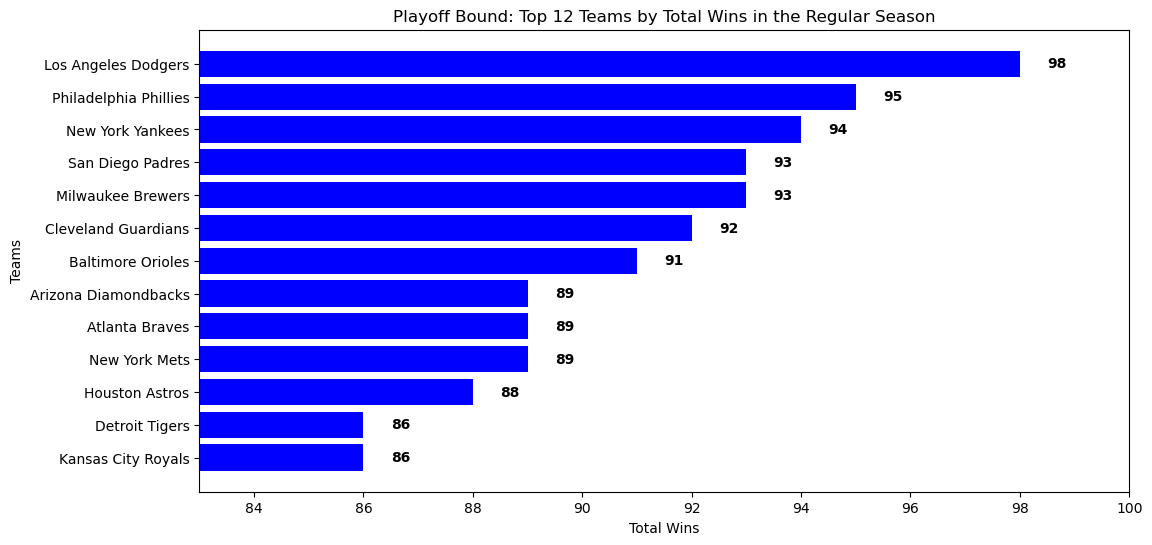

In [16]:
# Count wins per team
win_counts = Counter(train_reg_season["Winner"])

# Convert to a sorted list (descending order)
sorted_wins = sorted(win_counts.items(), key=lambda x: x[1], reverse=True)

# Extract top 12 teams only
top_teams = [team[0] for team in sorted_wins[:13]]
top_wins = [team[1] for team in sorted_wins[:13]]

# Plot the wins of the top 14 teams
plt.figure(figsize=(12, 6))
bars = plt.barh(top_teams, top_wins, color="blue")

# Add labels to each bar
for bar, win_count in zip(bars, top_wins):
    plt.text(win_count + 0.5, bar.get_y() + bar.get_height()/2, str(win_count),
             va='center', ha='left', fontsize=10, color='black', fontweight='bold')

# Format the chart
plt.xlabel("Total Wins")
plt.ylabel("Teams")
plt.title("Playoff Bound: Top 12 Teams by Total Wins in the Regular Season")
plt.gca().invert_yaxis()  # Invert Y-axis so the team with most wins is on top
plt.xlim(83,100)
plt.show()

In [17]:
# Encoding target variable (Winner)
encoder = LabelEncoder()
train_reg_season["Winner_Label"] = encoder.fit_transform(train_reg_season["Winner"])
test_playoffs["Winner_Label"] = encoder.transform(test_playoffs["Winner"])

# Selecting relevant features
features = ['AWAY SCORE', 'HOME SCORE', 'ATTENDANCE']
categorical_features = ['AWAY TEAM', 'HOME TEAM', 'VENUE', 'DAY NIGHT', 'GROUND']

# Encoding categorical features properly (One-Hot Encoding)
X_train = pd.get_dummies(train_reg_season[features + categorical_features], drop_first=True)
X_test = pd.get_dummies(test_playoffs[features + categorical_features], drop_first=True)

# Ensure columns match between training and testing sets
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

# Handling missing values
imputer_numeric = SimpleImputer(strategy="median")
X_train[features] = imputer_numeric.fit_transform(X_train[features])
X_test[features] = imputer_numeric.transform(X_test[features])

# Scale numerical features
scaler = StandardScaler()
X_train[features] = scaler.fit_transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])

# Define Target Variable
y_train = train_reg_season["Winner_Label"]
y_test = test_playoffs["Winner_Label"]

# Training Logistic Regression model on regular season dat
logreg = LogisticRegression(max_iter=7000)
logreg.fit(X_train, y_train)

# Train Random Forest model on regular season data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Calculating accuracy on postseason games
y_pred_rf = rf_model.predict(X_test)
log_reg_pred = logreg.predict(X_test)

# Generate playoff matchups using Logistic Regression predictions
log_reg_playoff_teams = test_playoffs.copy()
log_reg_playoff_teams["Predicted_Winner"] = encoder.inverse_transform(log_reg_pred)

# Evaluate Accuracy
train_accuracy_rf = accuracy_score(y_train, rf_model.predict(X_train))
train_accuracy_logreg = accuracy_score(y_train, logreg.predict(X_train))

postseason_accuracy_rf = accuracy_score(y_test, y_pred_rf)
postseason_accuracy_logreg = accuracy_score(y_test, log_reg_pred)

# Display Results
print("Training Accuracy (Random Forest): {:.5f}".format(train_accuracy_rf))
print("Training Accuracy (Logistic Regression): {:.5f}".format(train_accuracy_logreg))
print("Postseason Accuracy (Random Forest): {:.5f}".format(postseason_accuracy_rf))
print("Postseason Accuracy (Logistic Regression): {:.5f}".format(postseason_accuracy_logreg))


Training Accuracy (Random Forest): 1.00000
Training Accuracy (Logistic Regression): 0.71058
Postseason Accuracy (Random Forest): 0.88372
Postseason Accuracy (Logistic Regression): 0.67442


In [18]:
# Standardize column names (strip spaces and convert to uppercase for consistency)
mlb_season.columns = mlb_season.columns.str.strip().str.upper()
test_playoffs.columns = test_playoffs.columns.str.strip().str.upper()

# Fix column names by removing newlines and extra spaces
mlb_season.columns = mlb_season.columns.str.replace("\n", " ").str.strip().str.upper()
test_playoffs.columns = test_playoffs.columns.str.replace("\n", " ").str.strip().str.upper()

# Re-run the encoding process with fixed column names
for col in ["AWAY TEAM", "HOME TEAM", "VENUE", "GROUND"]:
    if col in mlb_season.columns and col in test_playoffs.columns:
        all_values = pd.concat([mlb_season[col], test_playoffs[col]]).astype(str).unique()
        encoder.fit(all_values)  # Fit encoder on all known values
    else:
        print(f"⚠️ Warning: Column '{col}' not found in datasets!")

In [19]:
# Define Wild Card matchups (best of 3 series)
wild_card_matchups = {
    "New York Mets vs. Milwaukee Brewers": {"away": "New York Mets", "home": "Milwaukee Brewers", "next_round": "Philadelphia Phillies"},
    "Kansas City Royals vs. Baltimore Orioles": {"away": "Kansas City Royals", "home": "Baltimore Orioles", "next_round": "New York Yankees"},
    "Detroit Tigers vs. Houston Astros": {"away": "Detroit Tigers", "home": "Houston Astros", "next_round": "Cleveland Guardians"},
    "Atlanta Braves vs. San Diego Padres": {"away": "Atlanta Braves", "home": "San Diego Padres", "next_round": "Los Angeles Dodgers"},
}

# Train LabelEncoder on all known teams (from regular season, playoffs, and matchups)
all_teams = pd.concat([
    mlb_season["AWAY TEAM"], mlb_season["HOME TEAM"],
    test_playoffs["AWAY TEAM"], test_playoffs["HOME TEAM"]
]).astype(str).unique()

# Include Wild Card teams in the encoder training
wild_card_teams = [team for matchup in wild_card_matchups.values() for team in [matchup["away"], matchup["home"]]]
all_teams = list(set(all_teams).union(set(wild_card_teams)))  # Ensure all teams are included

# Train LabelEncoder
encoder = LabelEncoder()
encoder.fit(all_teams)

# Debug: Check if all wild card teams are in the encoder
for matchup, teams in wild_card_matchups.items():
    away_team = teams["away"].strip()
    home_team = teams["home"].strip()
    if away_team not in encoder.classes_:
        print(f"⚠️ Warning: '{away_team}' is missing from LabelEncoder!")
    if home_team not in encoder.classes_:
        print(f"⚠️ Warning: '{home_team}' is missing from LabelEncoder!")


In [20]:
# Run Wild Card Predictions (Best of 3 Series) for Both Models and Display Winner with Next Opponent
wild_card_results_rf = {}  # Store results for Random Forest
wild_card_results_logreg = {}  # Store results for Logistic Regression

for matchup, teams in wild_card_matchups.items():
    away_team = teams["away"].strip()
    home_team = teams["home"].strip()

    # Initialize win counts for both models
    wins_rf = {away_team: 0, home_team: 0}
    wins_logreg = {away_team: 0, home_team: 0}

    for game in range(1, 4):  # Best of 3 series
        # Encode categorical values safely
        away_team_encoded = encoder.transform([away_team])[0] if away_team in encoder.classes_ else -1
        home_team_encoded = encoder.transform([home_team])[0] if home_team in encoder.classes_ else -1

        # Ensure venue has a value, handling missing data safely
        venue_mode = mlb_season[mlb_season["HOME TEAM"] == home_team]["VENUE"].mode()
        venue_value = venue_mode.iloc[0] if not venue_mode.empty else "Unknown Venue"
        venue_encoded = encoder.transform([venue_value])[0] if venue_value in encoder.classes_ else -1

        # Ensure "DAY NIGHT" and "GROUND" values exist before encoding
        day_night_mode = mlb_season["DAY NIGHT"].astype(str).mode()
        day_night_value = day_night_mode.iloc[0] if not day_night_mode.empty else "Unknown"
        day_night_encoded = encoder.transform([day_night_value])[0] if day_night_value in encoder.classes_ else -1

        ground_mode = mlb_season["GROUND"].astype(str).mode()
        ground_value = ground_mode.iloc[0] if not ground_mode.empty else "Unknown"
        ground_encoded = encoder.transform([ground_value])[0] if ground_value in encoder.classes_ else -1

        # Include all expected features, ensuring alignment with X_train
        game_data = {
            "AWAY TEAM": away_team_encoded,
            "HOME TEAM": home_team_encoded,
            "AWAY SCORE": 0,  # Placeholder
            "HOME SCORE": 0,  # Placeholder
            "ATTENDANCE": mlb_season["ATTENDANCE"].max(),  # Use max attendance
            "VENUE": venue_encoded,
            "DAY NIGHT": day_night_encoded,
            "GROUND": ground_encoded,
        }

        # Convert to DataFrame for model prediction
        game_df = pd.DataFrame([game_data])

        # Ensure exact feature alignment with training data
        game_df = game_df.reindex(columns=X_train.columns, fill_value=0)

        # Predict game winner using Random Forest
        predicted_winner_label_rf = rf_model.predict(game_df)[0]
        predicted_winner_rf = encoder.inverse_transform([predicted_winner_label_rf])[0] if predicted_winner_label_rf in encoder.classes_ else "Unknown"

        # Predict game winner using Logistic Regression
        predicted_winner_label_logreg = logreg.predict(game_df)[0]
        predicted_winner_logreg = encoder.inverse_transform([predicted_winner_label_logreg])[0] if predicted_winner_label_logreg in encoder.classes_ else "Unknown"

        # Update win count for both models
        if predicted_winner_rf in wins_rf:
            wins_rf[predicted_winner_rf] += 1
        if predicted_winner_logreg in wins_logreg:
            wins_logreg[predicted_winner_logreg] += 1

    # Determine series winners for both models
    series_winner_rf = max(wins_rf, key=wins_rf.get)  # Get team with highest win count (RF)
    series_winner_logreg = max(wins_logreg, key=wins_logreg.get)  # Get team with highest win count (LogReg)

    # Store results with next opponent
    wild_card_results_rf[matchup] = {
        "Series Winner": series_winner_rf,
        "Next Opponent": teams["next_round"]
    }
    wild_card_results_logreg[matchup] = {
        "Series Winner": series_winner_logreg,
        "Next Opponent": teams["next_round"]
    }

# Convert results to DataFrame and display both Series Winner and Next Opponent
wild_card_winners_df_rf = pd.DataFrame(wild_card_results_rf).T[["Series Winner", "Next Opponent"]]
wild_card_winners_df_logreg = pd.DataFrame(wild_card_results_logreg).T[["Series Winner", "Next Opponent"]]

# Iterate over the Wild Card winners and print their next matchups
print("\nRandom Forest Wild Card Results:")
for matchup, results in wild_card_results_rf.items():
    print(f"{results['Series Winner']} will play {results['Next Opponent']} in the Divisional Round")

print("\nLogistic Regression Wild Card Results:")
for matchup, results in wild_card_results_logreg.items():
    print(f"{results['Series Winner']} will play {results['Next Opponent']} in the Divisional Round")



Random Forest Wild Card Results:
New York Mets will play Philadelphia Phillies in the Divisional Round
Kansas City Royals will play New York Yankees in the Divisional Round
Detroit Tigers will play Cleveland Guardians in the Divisional Round
Atlanta Braves will play Los Angeles Dodgers in the Divisional Round

Logistic Regression Wild Card Results:
New York Mets will play Philadelphia Phillies in the Divisional Round
Kansas City Royals will play New York Yankees in the Divisional Round
Detroit Tigers will play Cleveland Guardians in the Divisional Round
Atlanta Braves will play Los Angeles Dodgers in the Divisional Round


In [21]:
# Define Divisional Round matchups based on Wild Card winners using Random Forest ML
divisional_round_matchups_rf = {
    f"{wild_card_results_rf['New York Mets vs. Milwaukee Brewers']['Series Winner']} vs. Philadelphia Phillies": {
        "away": wild_card_results_rf["New York Mets vs. Milwaukee Brewers"]["Series Winner"],
        "home": "Philadelphia Phillies",
        "next_round": "League Championship Series"
    },
    f"{wild_card_results_rf['Atlanta Braves vs. San Diego Padres']['Series Winner']} vs. Los Angeles Dodgers": {
        "away": wild_card_results_rf["Atlanta Braves vs. San Diego Padres"]["Series Winner"],
        "home": "Los Angeles Dodgers",
        "next_round": "League Championship Series"
    },
    f"{wild_card_results_rf['Kansas City Royals vs. Baltimore Orioles']['Series Winner']} vs. New York Yankees": {
        "away": wild_card_results_rf["Kansas City Royals vs. Baltimore Orioles"]["Series Winner"],
        "home": "New York Yankees",
        "next_round": "League Championship Series"
    },
    f"{wild_card_results_rf['Detroit Tigers vs. Houston Astros']['Series Winner']} vs. Cleveland Guardians": {
        "away": wild_card_results_rf["Detroit Tigers vs. Houston Astros"]["Series Winner"],
        "home": "Cleveland Guardians",
        "next_round": "League Championship Series"
    },
}

# Define Divisional Round matchups based on Wild Card winners using Logistic Regression ML
divisional_round_matchups_logreg = {
    f"{wild_card_results_logreg['New York Mets vs. Milwaukee Brewers']['Series Winner']} vs. Philadelphia Phillies": {
        "away": wild_card_results_logreg["New York Mets vs. Milwaukee Brewers"]["Series Winner"],
        "home": "Philadelphia Phillies",
        "next_round": "League Championship Series"
    },
    f"{wild_card_results_logreg['Atlanta Braves vs. San Diego Padres']['Series Winner']} vs. Los Angeles Dodgers": {
        "away": wild_card_results_logreg["Atlanta Braves vs. San Diego Padres"]["Series Winner"],
        "home": "Los Angeles Dodgers",
        "next_round": "League Championship Series"
    },
    f"{wild_card_results_logreg['Kansas City Royals vs. Baltimore Orioles']['Series Winner']} vs. New York Yankees": {
        "away": wild_card_results_logreg["Kansas City Royals vs. Baltimore Orioles"]["Series Winner"],
        "home": "New York Yankees",
        "next_round": "League Championship Series"
    },
    f"{wild_card_results_logreg['Detroit Tigers vs. Houston Astros']['Series Winner']} vs. Cleveland Guardians": {
        "away": wild_card_results_logreg["Detroit Tigers vs. Houston Astros"]["Series Winner"],
        "home": "Cleveland Guardians",
        "next_round": "League Championship Series"
    },
}



In [22]:
# Run Divisional Round Predictions (Best of 5 Series) and Display Winner with Next Opponent using Random Forest Model
divisional_results_rf = {}  # Store results for Random Forest
divisional_results_logreg = {}  # Store results for Logistic Regression

for matchup, teams in divisional_round_matchups_rf.items():
    away_team = teams["away"].strip()
    home_team = teams["home"].strip()

    # Initialize win counts for Random Forest Model
    wins_rf = {away_team: 0, home_team: 0}

    # Home game alternation pattern: 2-2-1
    home_games = [home_team, home_team, away_team, away_team, home_team]

    for game in range(1, 6):  # Best of 5 series
        current_home_team = home_games[game - 1]
        current_away_team = away_team if current_home_team == home_team else home_team

        # Encode categorical values safely
        away_team_encoded = encoder.transform([current_away_team])[0] if current_away_team in encoder.classes_ else -1
        home_team_encoded = encoder.transform([current_home_team])[0] if current_home_team in encoder.classes_ else -1

        # Ensure venue has a value, handling missing data safely
        venue_mode = mlb_season[mlb_season["HOME TEAM"] == current_home_team]["VENUE"].mode()
        venue_value = venue_mode.iloc[0] if not venue_mode.empty else "Unknown Venue"
        venue_encoded = encoder.transform([venue_value])[0] if venue_value in encoder.classes_ else -1

        # Ensure "DAY NIGHT" and "GROUND" values exist before encoding
        day_night_mode = mlb_season["DAY NIGHT"].astype(str).mode()
        day_night_value = day_night_mode.iloc[0] if not day_night_mode.empty else "Unknown"
        day_night_encoded = encoder.transform([day_night_value])[0] if day_night_value in encoder.classes_ else -1

        ground_mode = mlb_season["GROUND"].astype(str).mode()
        ground_value = ground_mode.iloc[0] if not ground_mode.empty else "Unknown"
        ground_encoded = encoder.transform([ground_value])[0] if ground_value in encoder.classes_ else -1

        # Include all expected features, ensuring alignment with X_train
        game_data = {
            "AWAY TEAM": away_team_encoded,
            "HOME TEAM": home_team_encoded,
            "AWAY SCORE": 0,  # Placeholder
            "HOME SCORE": 0,  # Placeholder
            "ATTENDANCE": mlb_season["ATTENDANCE"].max(),  # Use max attendance
            "VENUE": venue_encoded,
            "DAY NIGHT": day_night_encoded,
            "GROUND": ground_encoded,
        }

        # Convert to DataFrame for model prediction
        game_df = pd.DataFrame([game_data])

        # Ensure exact feature alignment with training data
        game_df = game_df.reindex(columns=X_train.columns, fill_value=0)

        # Predict game winner using Random Forest
        predicted_winner_label_rf = rf_model.predict(game_df)[0]
        predicted_winner_rf = encoder.inverse_transform([predicted_winner_label_rf])[0] if predicted_winner_label_rf in encoder.classes_ else "Unknown"

        # Update win count for Random Forest Model
        if predicted_winner_rf in wins_rf:
            wins_rf[predicted_winner_rf] += 1

    # Determine series winners for Random Forest model
    series_winner_rf = max(wins_rf, key=wins_rf.get)  # Get team with highest win count (RF)


    # Store results properly
    divisional_results_rf[matchup] = series_winner_rf

# Convert results to DataFrame
divisional_winners_rf = list(divisional_results_rf.values())

In [23]:
# Run Divisional Round Predictions (Best of 5 Series) and Display Winner with Next Opponent using Logistic Regression Model
for matchup, teams in divisional_round_matchups_logreg.items():
    away_team = teams["away"].strip()
    home_team = teams["home"].strip()

    # Initialize win counts for Logistic Regression model
    wins_logreg = {away_team: 0, home_team: 0}

    # Home game alternation pattern: 2-2-1
    home_games = [home_team, home_team, away_team, away_team, home_team]

    for game in range(1, 6):  # Best of 5 series
        current_home_team = home_games[game - 1]
        current_away_team = away_team if current_home_team == home_team else home_team

        # Encode categorical values safely
        away_team_encoded = encoder.transform([current_away_team])[0] if current_away_team in encoder.classes_ else -1
        home_team_encoded = encoder.transform([current_home_team])[0] if current_home_team in encoder.classes_ else -1

        # Ensure venue has a value, handling missing data safely
        venue_mode = mlb_season[mlb_season["HOME TEAM"] == current_home_team]["VENUE"].mode()
        venue_value = venue_mode.iloc[0] if not venue_mode.empty else "Unknown Venue"
        venue_encoded = encoder.transform([venue_value])[0] if venue_value in encoder.classes_ else -1

        # Ensure "DAY NIGHT" and "GROUND" values exist before encoding
        day_night_mode = mlb_season["DAY NIGHT"].astype(str).mode()
        day_night_value = day_night_mode.iloc[0] if not day_night_mode.empty else "Unknown"
        day_night_encoded = encoder.transform([day_night_value])[0] if day_night_value in encoder.classes_ else -1

        ground_mode = mlb_season["GROUND"].astype(str).mode()
        ground_value = ground_mode.iloc[0] if not ground_mode.empty else "Unknown"
        ground_encoded = encoder.transform([ground_value])[0] if ground_value in encoder.classes_ else -1

        # Include all expected features, ensuring alignment with X_train
        game_data = {
            "AWAY TEAM": away_team_encoded,
            "HOME TEAM": home_team_encoded,
            "AWAY SCORE": 0,  # Placeholder
            "HOME SCORE": 0,  # Placeholder
            "ATTENDANCE": mlb_season["ATTENDANCE"].max(),  # Use max attendance
            "VENUE": venue_encoded,
            "DAY NIGHT": day_night_encoded,
            "GROUND": ground_encoded,
        }

        # Convert to DataFrame for model prediction
        game_df = pd.DataFrame([game_data])

        # Ensure exact feature alignment with training data
        game_df = game_df.reindex(columns=X_train.columns, fill_value=0)

        # Predict game winner using Logistic Regression
        predicted_winner_label_logreg = logreg.predict(game_df)[0]
        predicted_winner_logreg = encoder.inverse_transform([predicted_winner_label_logreg])[0] if predicted_winner_label_logreg in encoder.classes_ else "Unknown"

        # Update win count for Logistic Regression model
        if predicted_winner_logreg in wins_logreg:
            wins_logreg[predicted_winner_logreg] += 1

    # Determine series winners for Logistic Regression model
    series_winner_logreg = max(wins_logreg, key=wins_logreg.get)  # Get team with highest win count (LogReg)

    # Store results properly
    divisional_results_logreg[matchup] = series_winner_logreg

# Convert results to DataFrame
divisional_winners_logreg = list(divisional_results_logreg.values())

In [24]:
# Print matchups for League Championship Round
print("\nRandom Forest Divisional Round Results:")
for i in range(0, len(divisional_winners_rf), 2):
    print(f"{divisional_winners_rf[i]} will play {divisional_winners_rf[i + 1]} in the League Championship Round")

print("\nLogistic Regression Divisional Round Results:")
for i in range(0, len(divisional_winners_logreg), 2):
    print(f"{divisional_winners_logreg[i]} will play {divisional_winners_logreg[i + 1]} in the League Championship Round")


Random Forest Divisional Round Results:
New York Mets will play Atlanta Braves in the League Championship Round
Kansas City Royals will play Detroit Tigers in the League Championship Round

Logistic Regression Divisional Round Results:
New York Mets will play Atlanta Braves in the League Championship Round
Kansas City Royals will play Detroit Tigers in the League Championship Round


In [25]:
# Run League Championship Round Predictions (Best of 7 Series) and Display Winner with Next Opponent using Random Forest Model

# Ensure Divisional Round Results Exist
if 'divisional_winners_rf' not in locals() or 'divisional_winners_logreg' not in locals():
    print("⚠️ Warning: No Divisional Round results found. Please re-run the Divisional Round predictions before proceeding to the League Championship Round.")
else:
    # Extract League Championship Matchups from Divisional Winners
    league_championship_matchups_rf = [
        (divisional_winners_rf[0], divisional_winners_rf[1]),
        (divisional_winners_rf[2], divisional_winners_rf[3])
    ]

    # Store results
    league_championship_results_rf = {}
    league_championship_results_logreg = {}

    for matchups, model_name, model, results_dict in [
        (league_championship_matchups_rf, "Random Forest", rf_model, league_championship_results_rf),
    ]:


        for away_team, home_team in matchups:
            wins = {away_team: 0, home_team: 0}

            # Home game alternation pattern: 2-3-2
            home_games = [home_team, home_team, away_team, away_team, away_team, home_team, home_team]

            for game in range(1, 8):  # Best of 7 series
                current_home_team = home_games[game - 1]
                current_away_team = away_team if current_home_team == home_team else home_team

                # Encode categorical values safely
                away_team_encoded = encoder.transform([current_away_team])[0] if current_away_team in encoder.classes_ else -1
                home_team_encoded = encoder.transform([current_home_team])[0] if current_home_team in encoder.classes_ else -1

                # Ensure venue has a value, handling missing data safely
                venue_mode = mlb_season[mlb_season["HOME TEAM"] == current_home_team]["VENUE"].mode()
                venue_value = venue_mode.iloc[0] if not venue_mode.empty else "Unknown Venue"
                venue_encoded = encoder.transform([venue_value])[0] if venue_value in encoder.classes_ else -1

                # Ensure "DAY NIGHT" and "GROUND" values exist before encoding
                day_night_mode = mlb_season["DAY NIGHT"].astype(str).mode()
                day_night_value = day_night_mode.iloc[0] if not day_night_mode.empty else "Unknown"
                day_night_encoded = encoder.transform([day_night_value])[0] if day_night_value in encoder.classes_ else -1

                ground_mode = mlb_season["GROUND"].astype(str).mode()
                ground_value = ground_mode.iloc[0] if not ground_mode.empty else "Unknown"
                ground_encoded = encoder.transform([ground_value])[0] if ground_value in encoder.classes_ else -1

                # Include all expected features, ensuring alignment with X_train
                game_data = {
                    "AWAY TEAM": away_team_encoded,
                    "HOME TEAM": home_team_encoded,
                    "AWAY SCORE": 0,  # Placeholder
                    "HOME SCORE": 0,  # Placeholder
                    "ATTENDANCE": mlb_season["ATTENDANCE"].max(),  # Use max attendance
                    "VENUE": venue_encoded,
                    "DAY NIGHT": day_night_encoded,
                    "GROUND": ground_encoded,
                }

                # Convert to DataFrame for model prediction
                game_df = pd.DataFrame([game_data])

                # Ensure exact feature alignment with training data
                game_df = game_df.reindex(columns=X_train.columns, fill_value=0)

                # Predict game winner
                predicted_winner_label = model.predict(game_df)[0]
                predicted_winner = encoder.inverse_transform([predicted_winner_label])[0] if predicted_winner_label in encoder.classes_ else "Unknown"

                # Update win count
                if predicted_winner in wins:
                    wins[predicted_winner] += 1

            # Determine series winner
            series_winner = max(wins, key=wins.get)  # Get team with highest win count

            # Store results
            results_dict[(away_team, home_team)] = series_winner

    # Convert results to lists
    league_winners_rf = list(league_championship_results_rf.values())

In [26]:
    # Print World Series Matchups according to Random Forest Model
    print("\nRandom Forest League Championship Results:")
    print(f"The {league_winners_rf[0]} will play the {league_winners_rf[1]} in the World Series")


Random Forest League Championship Results:
The New York Mets will play the Kansas City Royals in the World Series


In [27]:
# Run League Championship Round Predictions (Best of 7 Series) and Display Winner with Next Opponent using Logistic Regression Model


# Ensure Divisional Round Results Exist
if 'divisional_winners_rf' not in locals() or 'divisional_winners_logreg' not in locals():
    print("⚠️ Warning: No Divisional Round results found. Please re-run the Divisional Round predictions before proceeding to the League Championship Round.")
else:
    # Extract League Championship Matchups from Divisional Winners
    league_championship_matchups_logreg = [
        (divisional_winners_logreg[0], divisional_winners_logreg[1]),
        (divisional_winners_logreg[2], divisional_winners_logreg[3])
    ]

    # Store results
    league_championship_results_logreg = {}

    for matchups, model_name, model, results_dict in [
        (league_championship_matchups_logreg, "Logistic Regression", logreg, league_championship_results_logreg)
    ]:


        for away_team, home_team in matchups:
            wins = {away_team: 0, home_team: 0}

            # Home game alternation pattern: 2-3-2
            home_games = [home_team, home_team, away_team, away_team, away_team, home_team, home_team]

            for game in range(1, 8):  # Best of 7 series
                current_home_team = home_games[game - 1]
                current_away_team = away_team if current_home_team == home_team else home_team

                # Encode categorical values safely
                away_team_encoded = encoder.transform([current_away_team])[0] if current_away_team in encoder.classes_ else -1
                home_team_encoded = encoder.transform([current_home_team])[0] if current_home_team in encoder.classes_ else -1

                # Ensure venue has a value, handling missing data safely
                venue_mode = mlb_season[mlb_season["HOME TEAM"] == current_home_team]["VENUE"].mode()
                venue_value = venue_mode.iloc[0] if not venue_mode.empty else "Unknown Venue"
                venue_encoded = encoder.transform([venue_value])[0] if venue_value in encoder.classes_ else -1

                # Ensure "DAY NIGHT" and "GROUND" values exist before encoding
                day_night_mode = mlb_season["DAY NIGHT"].astype(str).mode()
                day_night_value = day_night_mode.iloc[0] if not day_night_mode.empty else "Unknown"
                day_night_encoded = encoder.transform([day_night_value])[0] if day_night_value in encoder.classes_ else -1

                ground_mode = mlb_season["GROUND"].astype(str).mode()
                ground_value = ground_mode.iloc[0] if not ground_mode.empty else "Unknown"
                ground_encoded = encoder.transform([ground_value])[0] if ground_value in encoder.classes_ else -1

                # Include all expected features, ensuring alignment with X_train
                game_data = {
                    "AWAY TEAM": away_team_encoded,
                    "HOME TEAM": home_team_encoded,
                    "AWAY SCORE": 0,  # Placeholder
                    "HOME SCORE": 0,  # Placeholder
                    "ATTENDANCE": mlb_season["ATTENDANCE"].max(),  # Use max attendance
                    "VENUE": venue_encoded,
                    "DAY NIGHT": day_night_encoded,
                    "GROUND": ground_encoded,
                }

                # Convert to DataFrame for model prediction
                game_df = pd.DataFrame([game_data])

                # Ensure exact feature alignment with training data
                game_df = game_df.reindex(columns=X_train.columns, fill_value=0)

                # Predict game winner
                predicted_winner_label = model.predict(game_df)[0]
                predicted_winner = encoder.inverse_transform([predicted_winner_label])[0] if predicted_winner_label in encoder.classes_ else "Unknown"

                # Update win count
                if predicted_winner in wins:
                    wins[predicted_winner] += 1

            # Determine series winner
            series_winner = max(wins, key=wins.get)  # Get team with highest win count

            # Store results
            results_dict[(away_team, home_team)] = series_winner

    # Convert results to lists
    league_winners_logreg = list(league_championship_results_logreg.values())

In [28]:
    # Print World Series Matchups accoring to Logistic Regression Model
    print("\nLogistic Regression League Championship Results:")
    print(f"The {league_winners_logreg[0]} will play the {league_winners_logreg[1]} in the World Series")


Logistic Regression League Championship Results:
The New York Mets will play the Kansas City Royals in the World Series


In [29]:
# World Series Round

# Ensure League Championship Results Exist
if 'league_winners_rf' not in locals() or 'league_winners_logreg' not in locals():
    print("⚠️ Warning: No League Championship results found. Please re-run the League Championship predictions before proceeding to the World Series.")
else:
    # Extract World Series Matchups
    world_series_matchups_rf = (league_winners_rf[0], league_winners_rf[1])
    world_series_matchups_logreg = (league_winners_logreg[0], league_winners_logreg[1])

    # Store results
    world_series_results_rf = {}
    world_series_results_logreg = {}

    # Run predictions separately for Random Forest and Logistic Regression
    models = [
        ("Random Forest", rf_model, world_series_matchups_rf, world_series_results_rf),
        ("Logistic Regression", logreg, world_series_matchups_logreg, world_series_results_logreg),
    ]

    for model_name, model, matchup, results_dict in models:


        away_team, home_team = matchup
        wins = {away_team: 0, home_team: 0}

        # Home game alternation pattern: 2-3-2
        home_games = [home_team, home_team, away_team, away_team, away_team, home_team, home_team]

        for game in range(1, 8):  # Best of 7 series
            current_home_team = home_games[game - 1]
            current_away_team = away_team if current_home_team == home_team else home_team

            # Encode categorical values safely
            away_team_encoded = encoder.transform([current_away_team])[0] if current_away_team in encoder.classes_ else -1
            home_team_encoded = encoder.transform([current_home_team])[0] if current_home_team in encoder.classes_ else -1

            # Ensure venue has a value, handling missing data safely
            venue_mode = mlb_season[mlb_season["HOME TEAM"] == current_home_team]["VENUE"].mode()
            venue_value = venue_mode.iloc[0] if not venue_mode.empty else "Unknown Venue"
            venue_encoded = encoder.transform([venue_value])[0] if venue_value in encoder.classes_ else -1

            # Ensure "DAY NIGHT" and "GROUND" values exist before encoding
            day_night_mode = mlb_season["DAY NIGHT"].astype(str).mode()
            day_night_value = day_night_mode.iloc[0] if not day_night_mode.empty else "Unknown"
            day_night_encoded = encoder.transform([day_night_value])[0] if day_night_value in encoder.classes_ else -1

            ground_mode = mlb_season["GROUND"].astype(str).mode()
            ground_value = ground_mode.iloc[0] if not ground_mode.empty else "Unknown"
            ground_encoded = encoder.transform([ground_value])[0] if ground_value in encoder.classes_ else -1

            # Include all expected features, ensuring alignment with X_train
            game_data = {
                "AWAY TEAM": away_team_encoded,
                "HOME TEAM": home_team_encoded,
                "AWAY SCORE": 0,  # Placeholder
                "HOME SCORE": 0,  # Placeholder
                "ATTENDANCE": mlb_season["ATTENDANCE"].max(),  # Use max attendance
                "VENUE": venue_encoded,
                "DAY NIGHT": day_night_encoded,
                "GROUND": ground_encoded,
            }

            # Convert to DataFrame for model prediction
            game_df = pd.DataFrame([game_data])

            # Ensure exact feature alignment with training data
            game_df = game_df.reindex(columns=X_train.columns, fill_value=0)

            # Predict game winner
            predicted_winner_label = model.predict(game_df)[0]
            predicted_winner = encoder.inverse_transform([predicted_winner_label])[0] if predicted_winner_label in encoder.classes_ else "Unknown"

            # Update win count
            if predicted_winner in wins:
                wins[predicted_winner] += 1

        # Determine World Series Champion (team with most wins after 7 games)
        world_series_champion = max(wins, key=wins.get)  # Get team with highest win count

        # Store results
        results_dict[matchup] = world_series_champion

    # Step 3: Print World Series Champions
    print("\n Final World Series Predictions:")

    print(f"\n According to Random Forest, the {world_series_results_rf[world_series_matchups_rf]} will win the World Series!")
    print(f"\n According to Logistic Regression, the {world_series_results_logreg[world_series_matchups_logreg]} will win the World Series!")



 Final World Series Predictions:

 According to Random Forest, the New York Mets will win the World Series!

 According to Logistic Regression, the New York Mets will win the World Series!


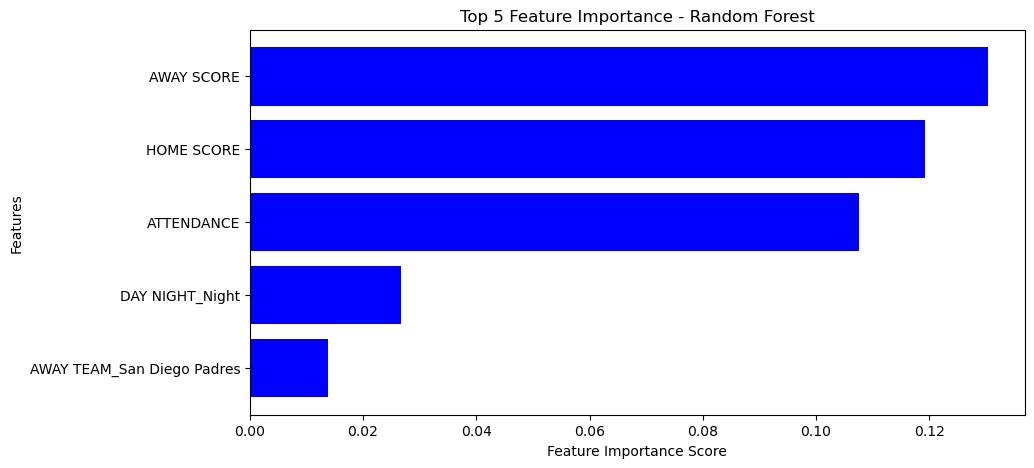

In [30]:
# Feature Importance for Random Forest

# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sort feature importance in descending order and select top 10
sorted_idx = np.argsort(importances)[::-1][:5]  # Keep only the top 10 features

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align="center", color="blue")
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 5 Feature Importance - Random Forest")
plt.gca().invert_yaxis()  # Invert y-axis to show most important at the top
plt.show()


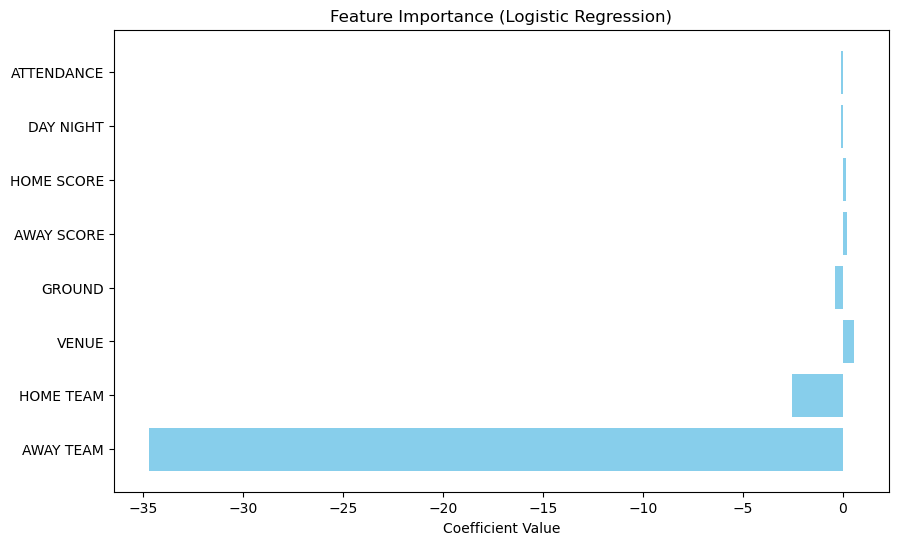

In [31]:
# Feature Importance for LogReg

# Get the coefficients
coefficients = logreg.coef_[0]

# Get feature names (X_train is your DataFrame after one-hot encoding)
feature_names = X_train.columns

# Create a DataFrame with feature names and corresponding coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Aggregate coefficients for one-hot encoded features
coef_df['Feature_Category'] = coef_df['Feature'].apply(lambda x: x.split('_')[0])

# Group by feature category and sum the coefficients
aggregated_coef_df = coef_df.groupby('Feature_Category').sum().reset_index()

# Sort by absolute value of the coefficients
aggregated_coef_df['Abs_Coefficient'] = aggregated_coef_df['Coefficient'].abs()
aggregated_coef_df = aggregated_coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(aggregated_coef_df['Feature_Category'], aggregated_coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Logistic Regression)')
plt.show()


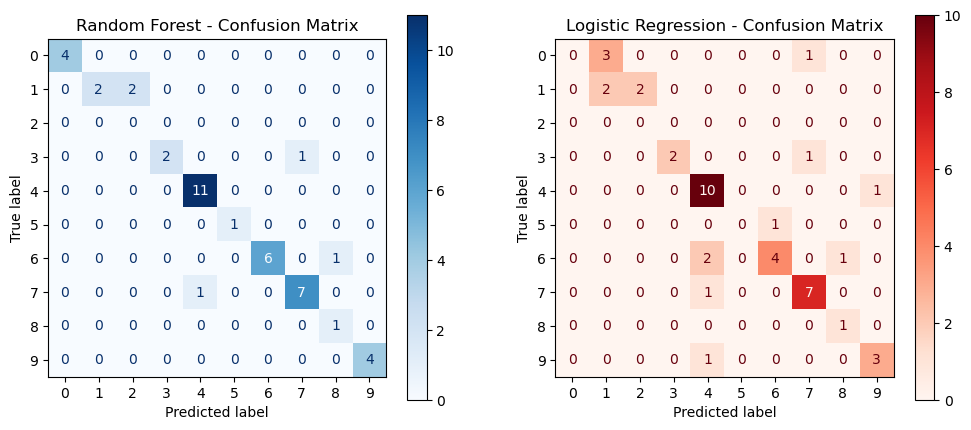

In [32]:
#Confusion Matrix: Random Forest vs. Logistic Regression

# Get predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_logreg = logreg.predict(X_test)

# Confusion Matrices
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Random Forest Confusion Matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Random Forest - Confusion Matrix")

# Logistic Regression Confusion Matrix
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg)
disp_logreg.plot(ax=axes[1], cmap='Reds')
axes[1].set_title("Logistic Regression - Confusion Matrix")

plt.show()


                    Team  Random Forest  Logistic Regression
0    Cleveland Guardians       0.597500             0.537432
1         Detroit Tigers       0.457500             0.555662
2     Kansas City Royals       0.276667             0.550061
3    Los Angeles Dodgers       0.638182             0.596879
4      Milwaukee Brewers       0.430000             0.758933
5          New York Mets       0.488571             0.629521
6       New York Yankees       0.436250             0.713238
7  Philadelphia Phillies       0.570000             0.496776
8       San Diego Padres       0.602500             0.662470


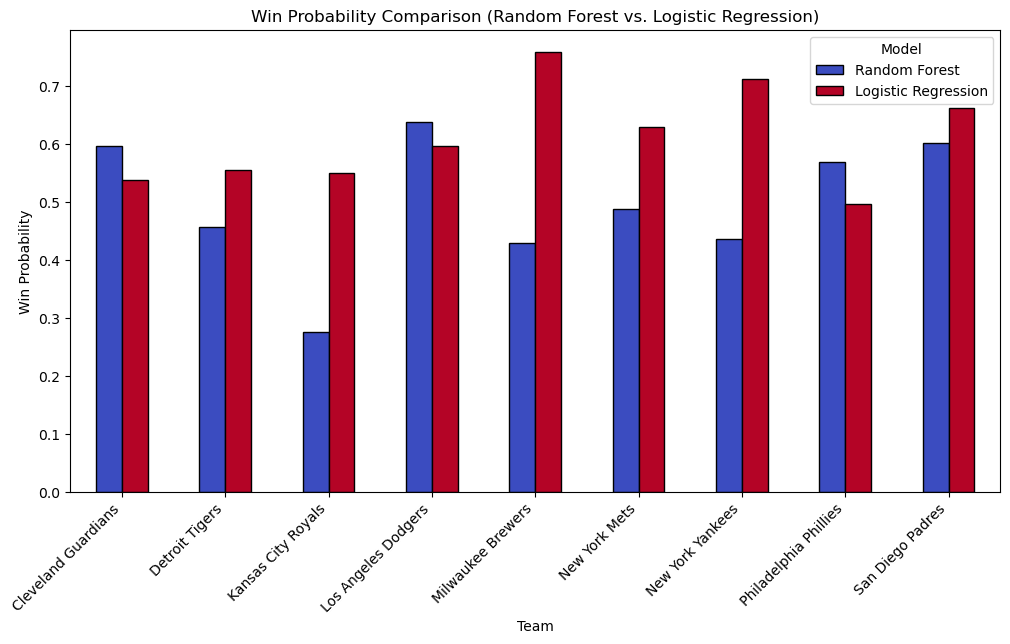

In [33]:
# Win Probability Comparison: Random Forest vs. Logistic Regression

# Get probabilities from models
y_proba_rf = rf_model.predict_proba(X_test)
y_proba_logreg = logreg.predict_proba(X_test)

# Extract Highest Probability per row
win_probs_rf = np.max(y_proba_rf, axis=1)
win_probs_logreg = np.max(y_proba_logreg, axis=1)

# Ensure Label Encoder is Fitted on Full Dataset Before Splitting
encoder = LabelEncoder()
encoder.fit(mlb_season["WINNER"])  # Fit encoder on full dataset before splitting

# Decode y_test to Get Actual Team Names
teams_test = encoder.inverse_transform(y_test)  # Convert labels back to team names

# Create DataFrame with all teams
win_prob_df = pd.DataFrame({
    "Team": teams_test,  
    "Random Forest": win_probs_rf,
    "Logistic Regression": win_probs_logreg
})

# Aggregate (Average Probability Per Team)
win_prob_df = win_prob_df.groupby("Team").mean().reset_index()

# Expand Display to Show All Teams
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.width", 1000)  # Prevent text wrapping

# Verify All Teams Are Displayed
print(win_prob_df)

# Plot Win Probability Comparison
fig, ax = plt.subplots(figsize=(12, 6))
win_prob_df.set_index("Team").plot(kind="bar", ax=ax, colormap="coolwarm", edgecolor="black")

plt.title("Win Probability Comparison (Random Forest vs. Logistic Regression)")
plt.ylabel("Win Probability")
plt.xlabel("Team")
plt.xticks(rotation=45, ha="right")  # Ensure team names are displayed properly
plt.legend(title="Model")
plt.show()


In [34]:
# Calculate precision and F1-score for Random Forest
precision_rf = precision_score(y_test, y_pred_rf, average="weighted", zero_division=0)
f1_score_rf = f1_score(y_test, y_pred_rf, average="weighted")

# Calculate precision and F1-score for Logistic Regression
precision_logreg = precision_score(y_test, y_pred_logreg, average="weighted", zero_division=0)
f1_score_logreg = f1_score(y_test, y_pred_logreg, average="weighted")

# Display results
precision_f1_results = {
    "Model": ["Random Forest", "Logistic Regression"],
    "Precision": [precision_rf, precision_logreg],
    "F1 Score": [f1_score_rf, f1_score_logreg]
}

precision_f1_df = pd.DataFrame(precision_f1_results)
print(precision_f1_df)


                 Model  Precision  F1 Score
0        Random Forest   0.943798  0.900386
1  Logistic Regression   0.646032  0.648822


In [55]:
# Cross-validation for Logistic Regression
logreg_cv_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring="accuracy")
print("Logistic Regression Cross-validation Accuracy:", logreg_cv_scores.mean())

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="accuracy")
print("Random Forest Cross-validation Accuracy:", rf_cv_scores.mean())


Logistic Regression Cross-validation Accuracy: 0.5245416187188339
Random Forest Cross-validation Accuracy: 0.6798018156246004


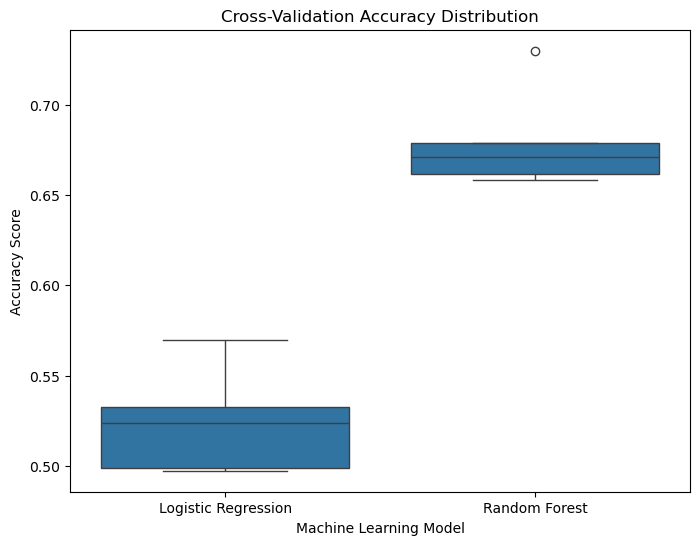

In [57]:
# Combine scores for visualization
cv_results = {
    "Model": ["Logistic Regression"] * len(logreg_cv_scores) + ["Random Forest"] * len(rf_cv_scores),
    "Accuracy": np.concatenate([logreg_cv_scores, rf_cv_scores])
}

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Model", y="Accuracy", data=cv_results)
plt.title("Cross-Validation Accuracy Distribution")
plt.ylabel("Accuracy Score")
plt.xlabel("Machine Learning Model")
plt.show()
